In [ ]:
#Loading Libraries and Data

In [6]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
df=pd.read_csv(r'C:\Users\Navaneetha\Downloads\Telco-Customer-Churn.csv')

In [ ]:
#Understanding the Data

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Visualize Missing Values

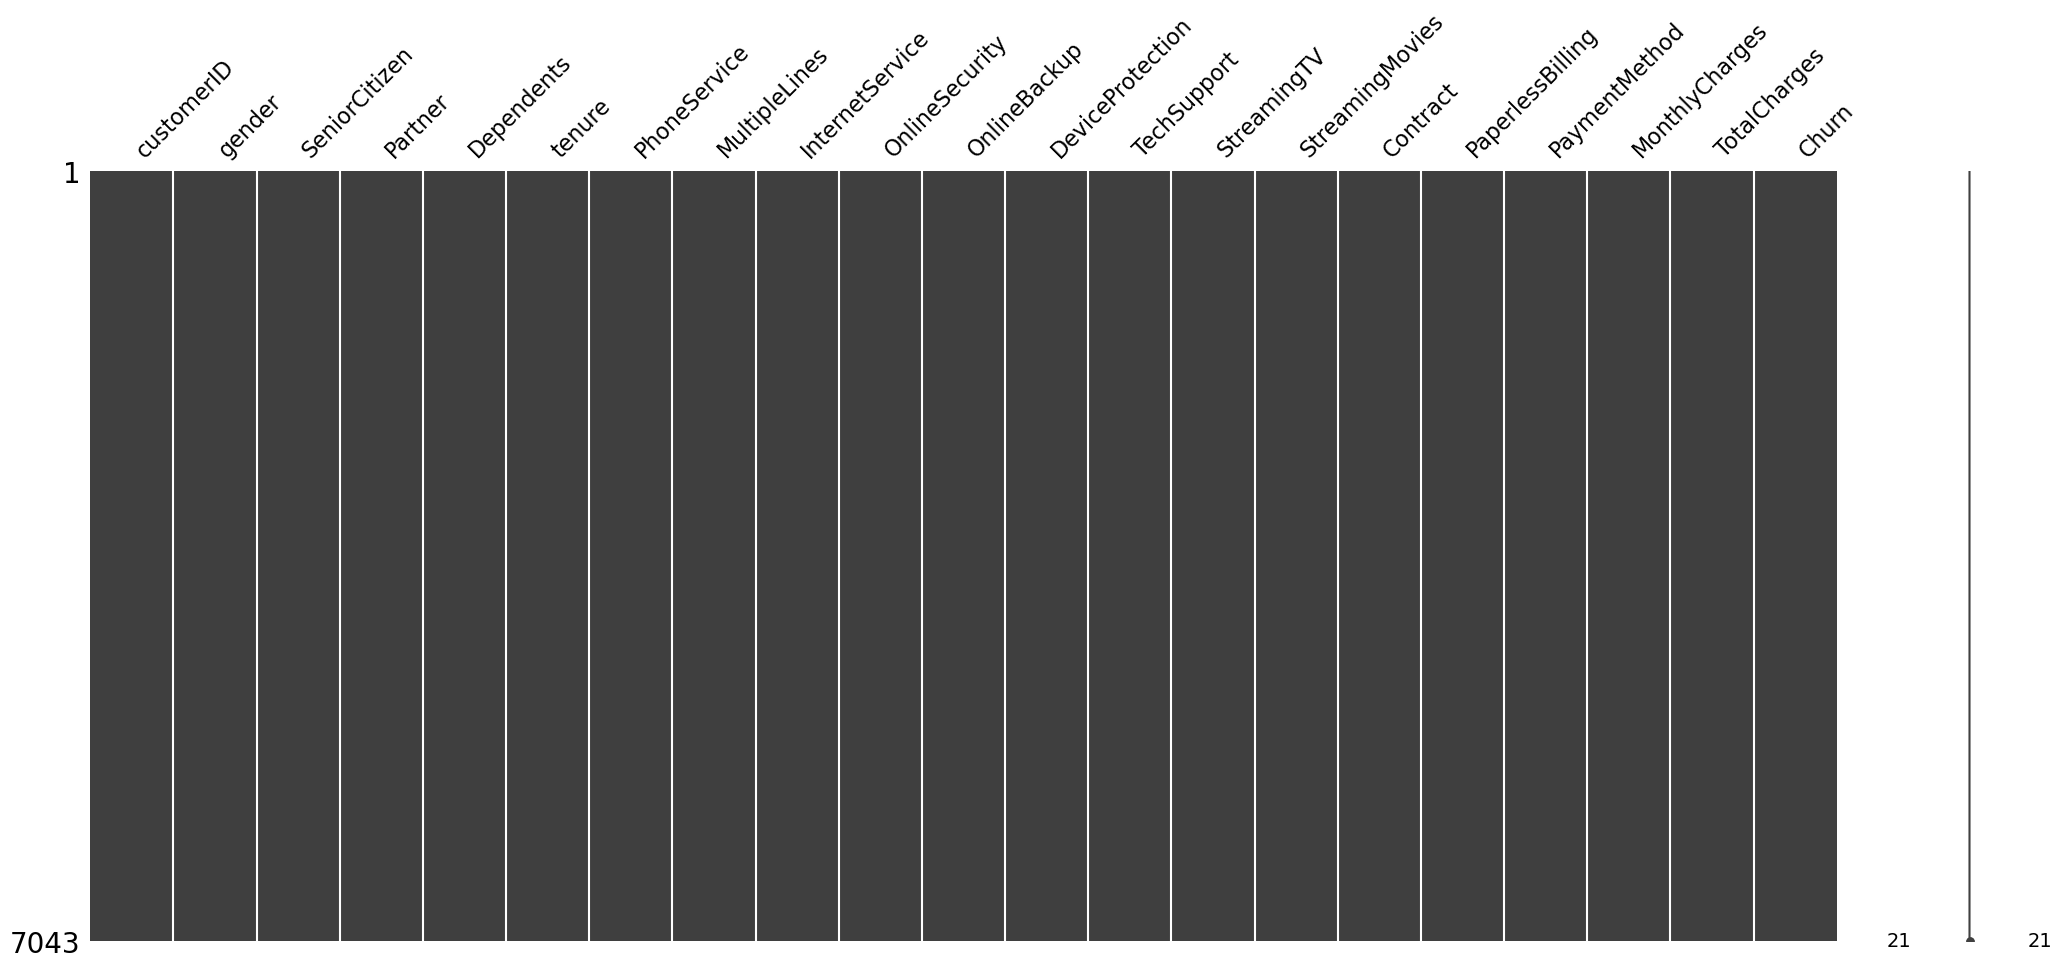

In [10]:
msno.matrix(df);

In [ ]:
#Data Manipulation 

In [11]:
df=df.drop(['customerID'],axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [15]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Index([], dtype='int64')

In [16]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df["SeniorCitizen"]=df["SeniorCitizen"].map({0:"No",1:"Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [20]:
numerical_cols=['tenure','MonthlyCharges','TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
#Data Visualization

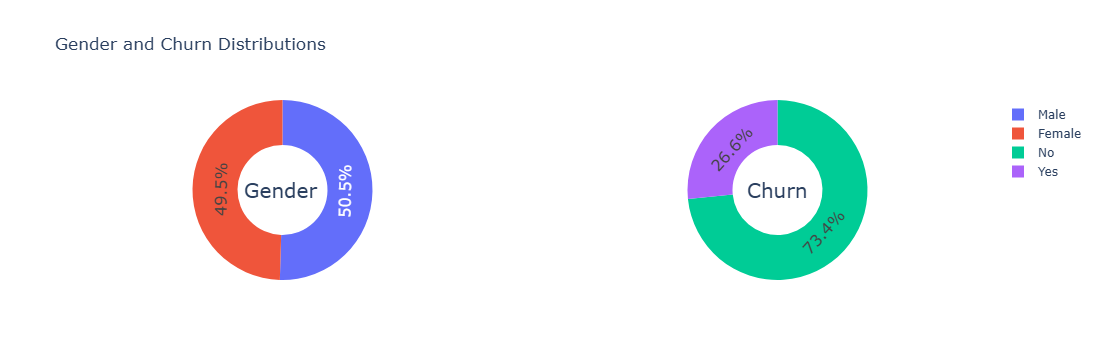

In [56]:
g_labels=['Male','Female']
c_labels=['No','Yes']
fig=make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels,values=df['gender'].value_counts(),name="Gender"),1,1)
fig.add_trace(go.Pie(labels=c_labels,values=df['Churn'].value_counts(),name="Churn"),1,2)
fig.update_traces(hole=.5,hoverinfo="label+percent+name",textfont_size=16)
fig.update_layout(title_text="Gender and Churn Distributions",annotations=[dict(text='Gender',x=0.18,y=0.5,font_size=20,showarrow=False),dict(text='Churn',x=0.81,y=0.5,font_size=20,showarrow=False)])
fig.show()

In [57]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [58]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

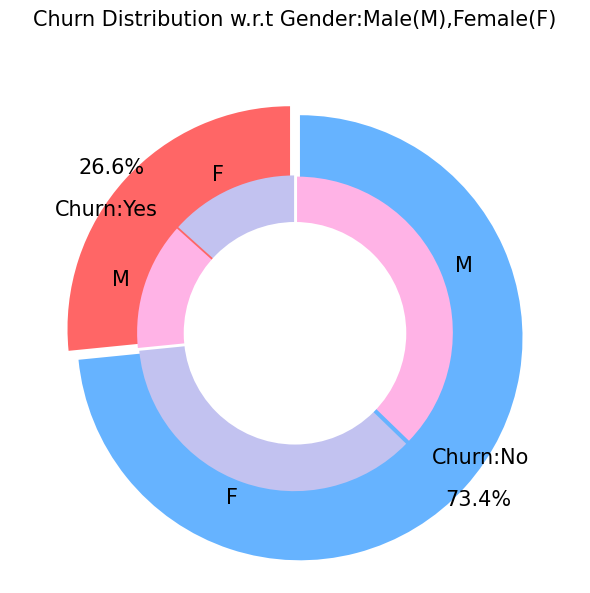

In [61]:
plt.figure(figsize=(6,6))
labels=["Churn:Yes","Churn:No"]
values=[1869,5163]
labels_gender=["F","M","F","M"]
sizes_gender=[939,930 , 2544,2619]
colors=['#ff6666','#66b3ff']
colors_gender=['#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
explode=(0.3,0.3) 
explode_gender=(0.1,0.1,0.1,0.1)
textprops={"fontsize":15}
plt.pie(values,labels=labels,autopct='%1.1f%%',pctdistance=1.08,labeldistance=0.8,colors=colors,startangle=90,frame=True,explode=explode,radius=10, textprops =textprops,counterclock = True,)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90,explode=explode_gender,radius=7,textprops=textprops,counterclock=True,)
centre_circle=plt.Circle((0,0),5,color='black',fc='white',linewidth=0)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender:Male(M),Female(F)',fontsize=15,y=1.1)
#show plot 
plt.axis('equal')
plt.tight_layout()
plt.show()

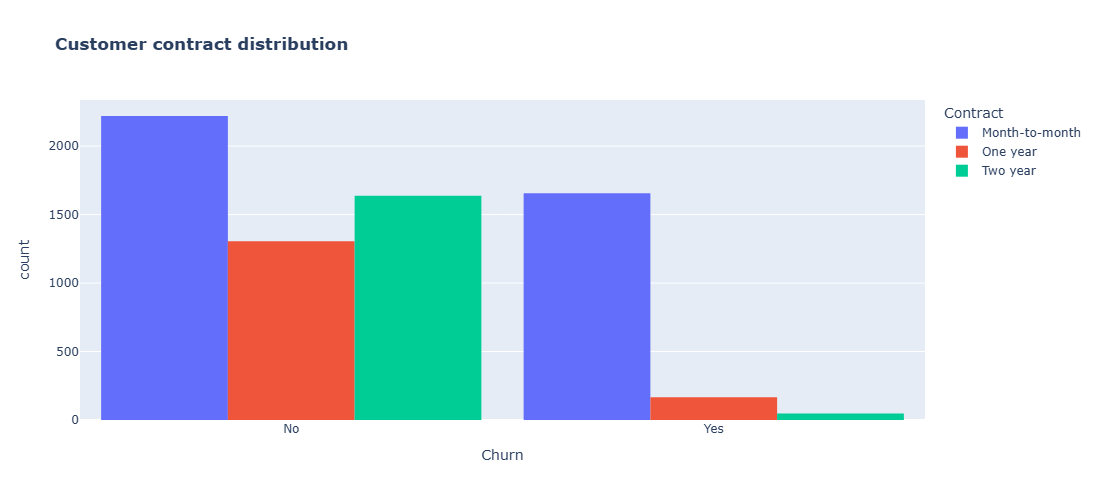

In [62]:
fig=px.histogram(df,x="Churn",color="Contract",barmode="group",title="<b>Customer Contract Distribution<b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

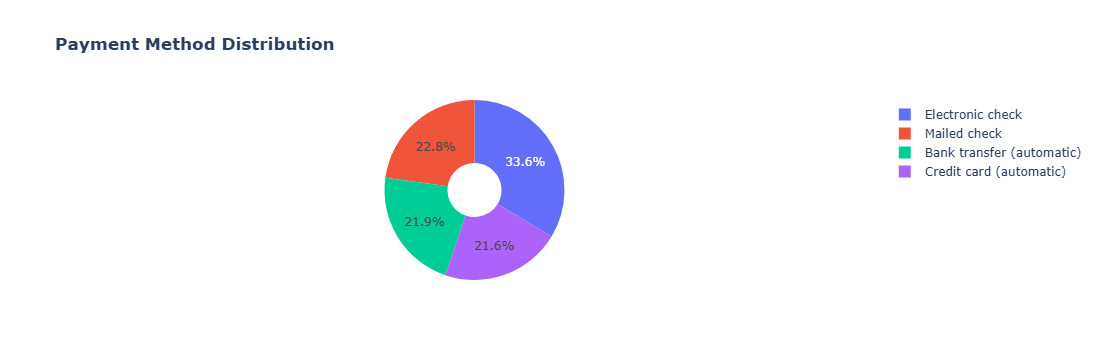

In [63]:
labels=df['PaymentMethod'].unique()
values=df['PaymentMethod'].value_counts()
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

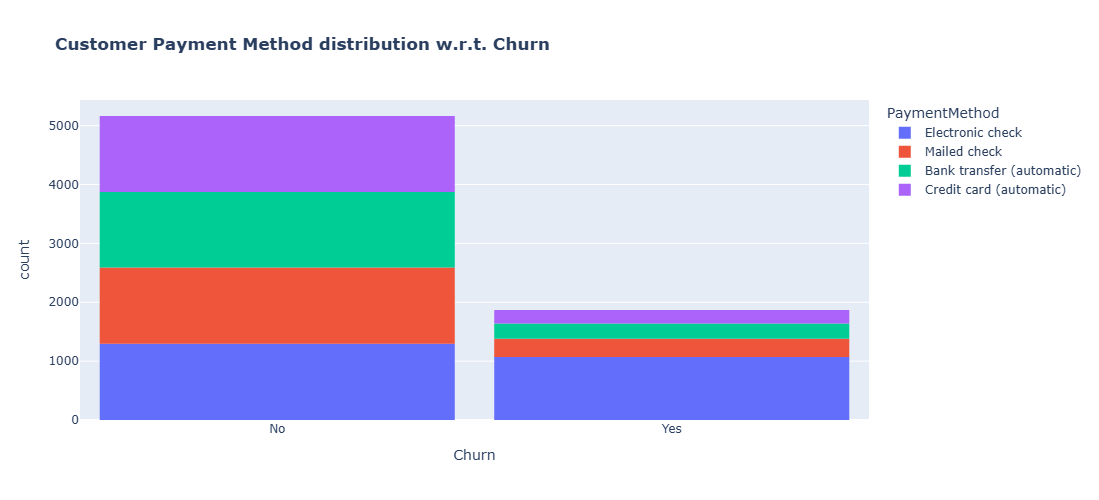

In [64]:
fig=px.histogram(df,x="Churn",color="PaymentMethod",title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [65]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [66]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [67]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

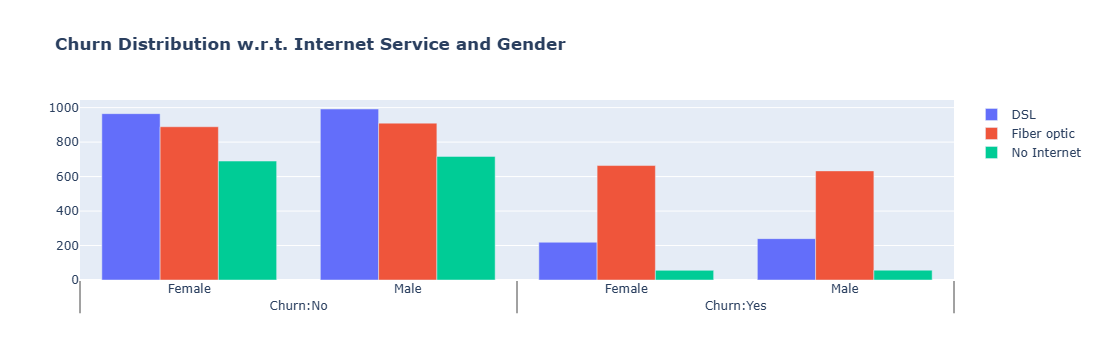

In [69]:
fig=go.Figure()
fig.add_trace(go.Bar(
  x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],["Female","Male","Female","Male"]],
  y=[965, 992, 219, 240],name = 'DSL',))
fig.add_trace(go.Bar(
  x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],["Female","Male","Female","Male"]],
  y=[889, 910, 664, 633],name='Fiber optic',))
fig.add_trace(go.Bar(
  x=[['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],["Female","Male","Female","Male"]],
  y=[690, 717, 56, 57],name='No Internet',))
fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.show()

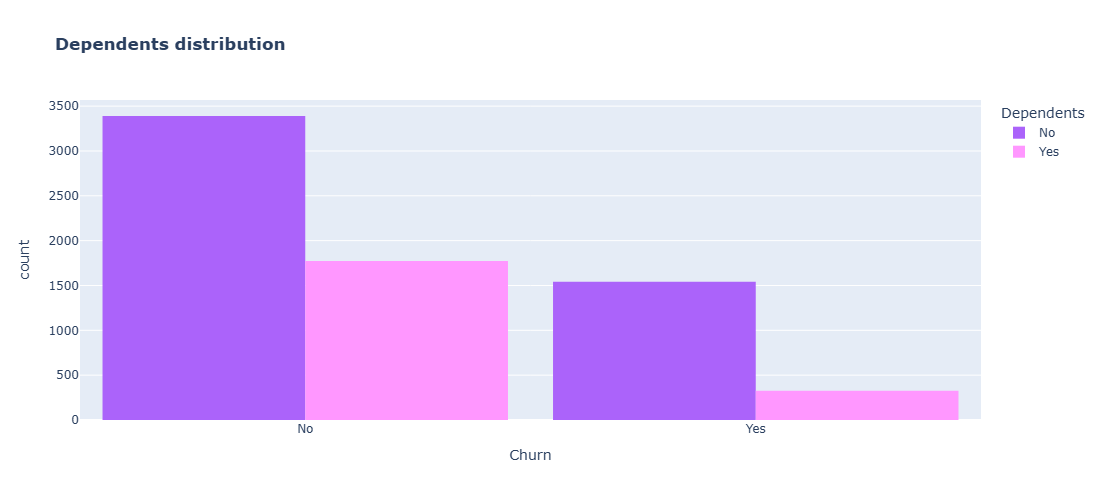

In [70]:
color_map={"Yes":"#FF97FF","No":"#AB63FA"}
fig=px.histogram(df,x="Churn",color="Dependents",barmode="group",title="<b>Dependents distribution</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

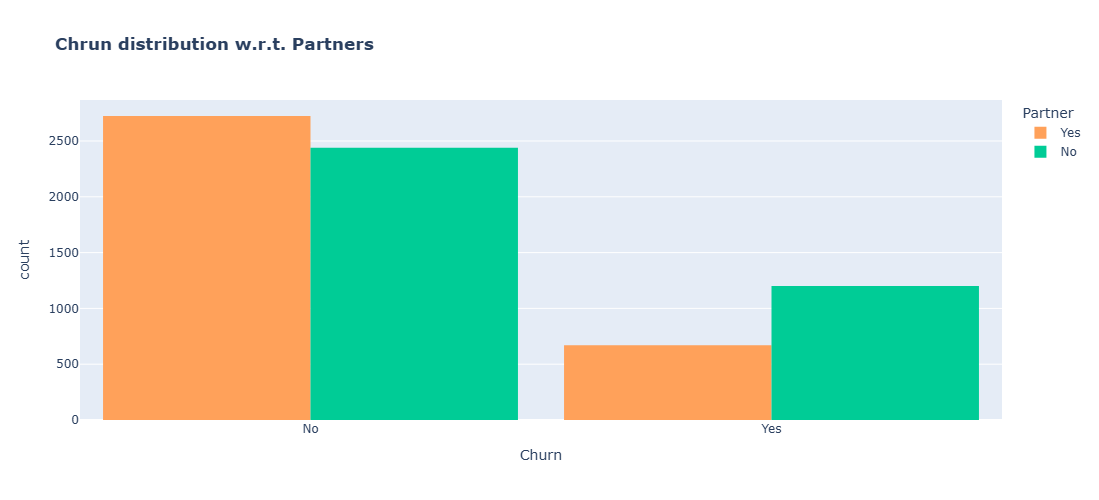

In [72]:
color_map= {"Yes":'#FFA15A',"No":'#00CC96'}
fig=px.histogram(df,x="Churn",color="Partner",barmode="group",title="<b>Chrun distribution w.r.t. Partners</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

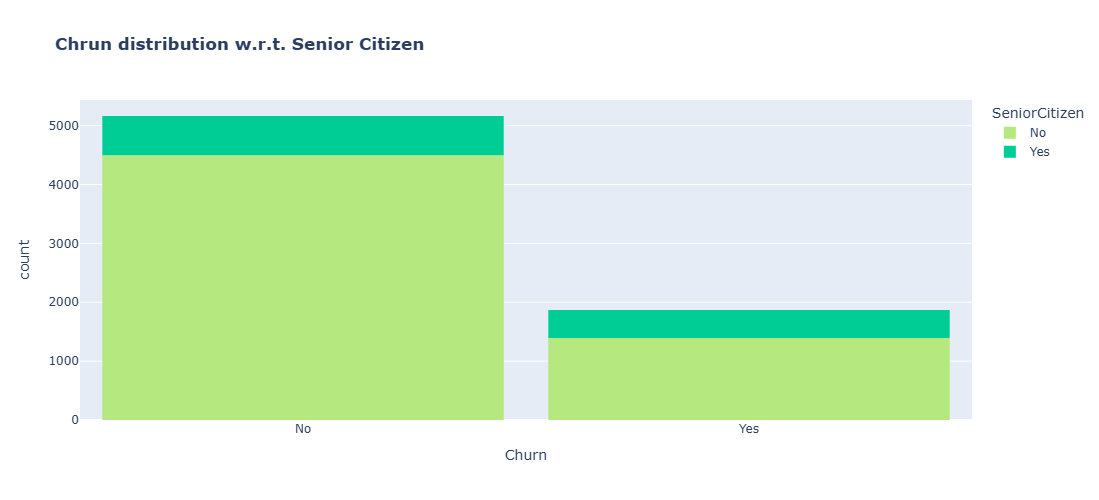

In [73]:
color_map={"Yes":'#00CC96',"No":'#B6E880'}
fig=px.histogram(df,x="Churn",color="SeniorCitizen",title="<b>Chrun distribution w.r.t. Senior Citizen</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

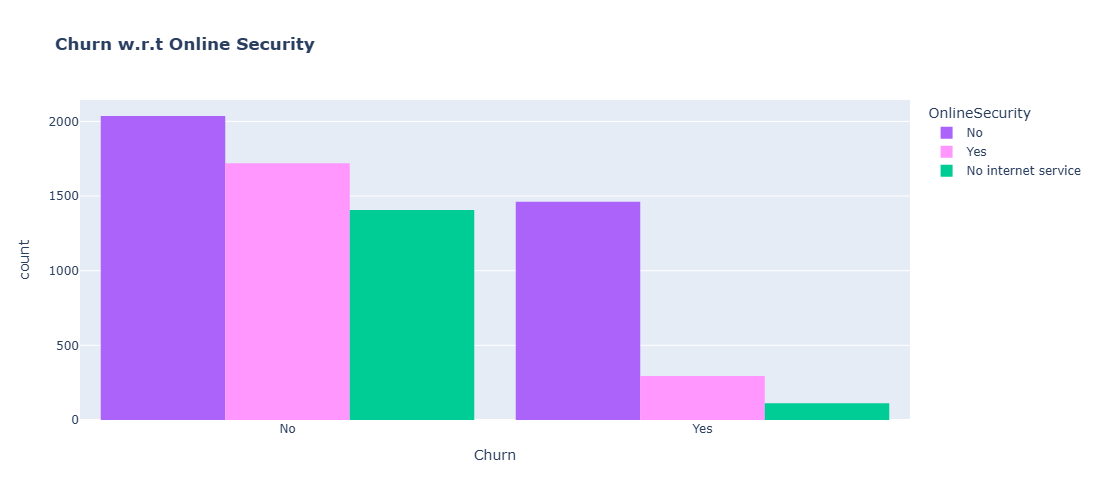

In [74]:
color_map={"Yes":"#FF97FF","No":"#AB63FA"}
fig = px.histogram(df, x="Churn",color="OnlineSecurity",barmode="group",title="<b>Churn w.r.t Online Security</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

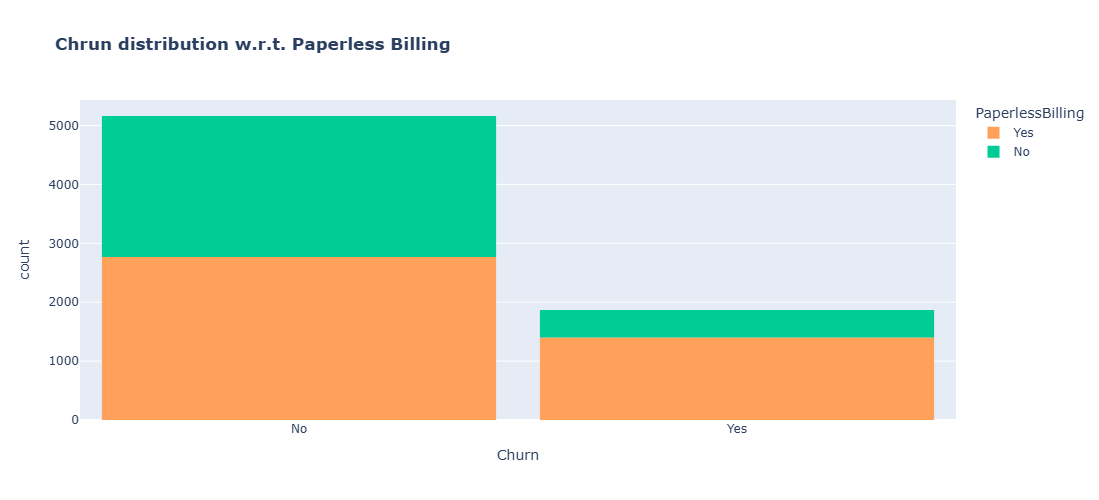

In [75]:
color_map={"Yes":'#FFA15A',"No":'#00CC96'}
fig = px.histogram(df, x="Churn",color="PaperlessBilling", title="<b>Chrun distribution w.r.t. Paperless Billing</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

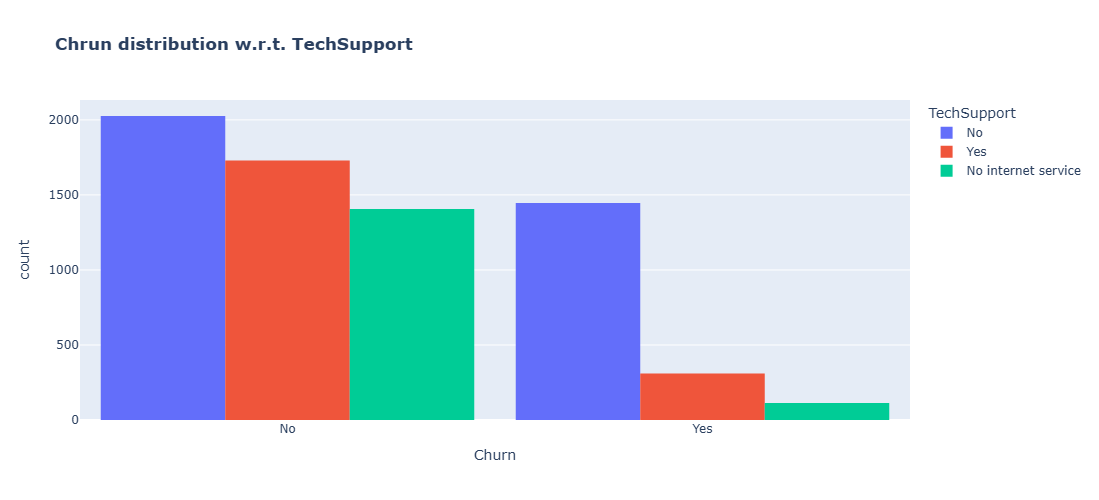

In [76]:
fig=px.histogram(df,x="Churn",color="TechSupport",barmode="group", title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

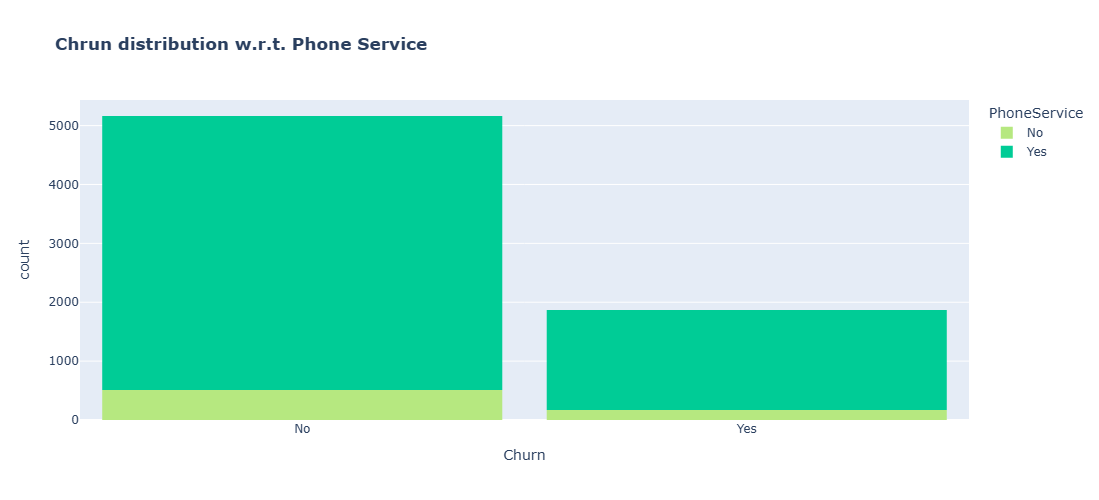

In [77]:
color_map={"Yes":'#00CC96',"No":'#B6E880'}
fig=px.histogram(df, x="Churn",color="PhoneService",title="<b>Chrun distribution w.r.t. Phone Service</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

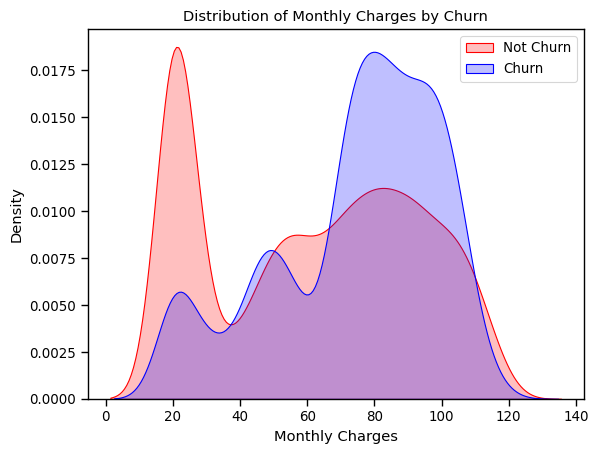

In [78]:
sns.set_context("paper",font_scale=1.1)
ax=sns.kdeplot(df.MonthlyCharges[(df["Churn"]=='No')],color="Red",shade=True);
ax=sns.kdeplot(df.MonthlyCharges[(df["Churn"]=='Yes')],ax=ax,color="Blue",shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by Churn');

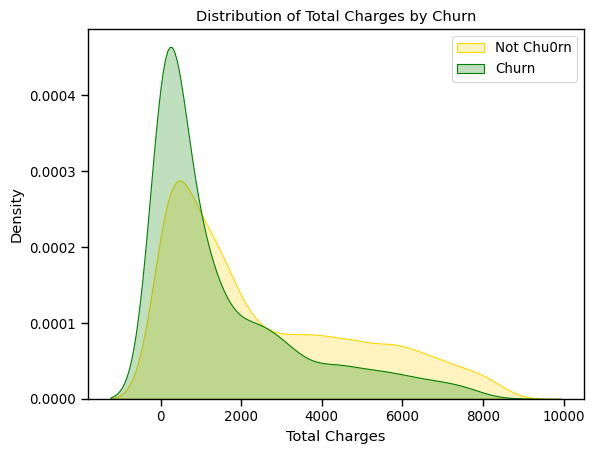

In [79]:
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]=='No')],color="Gold",shade=True);
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]=='Yes')],ax=ax,color="Green",shade=True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of Total Charges by Churn');

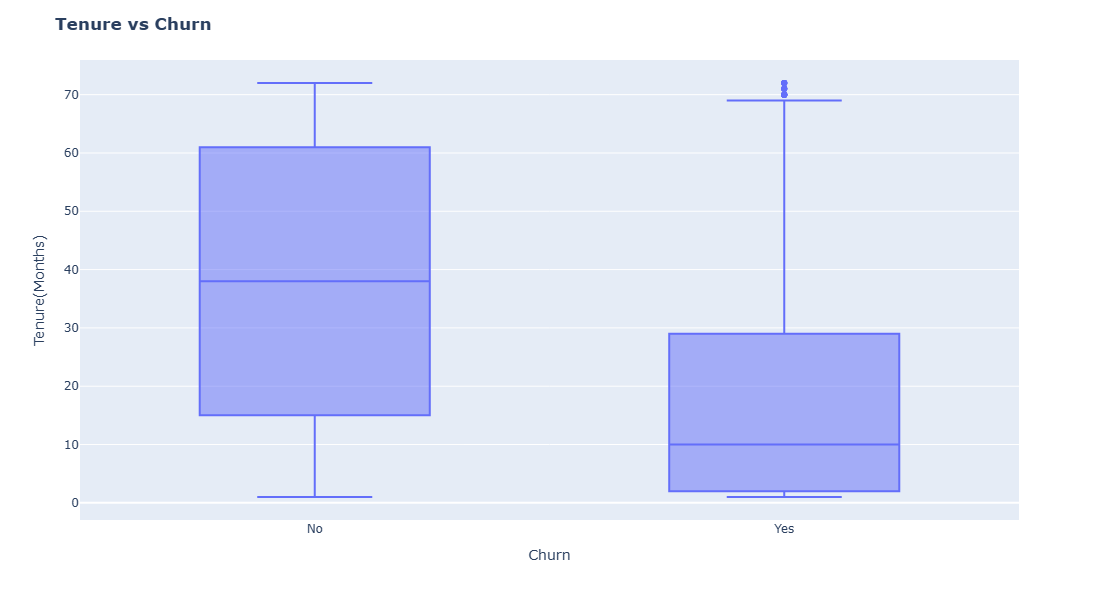

In [80]:
fig=px.box(df,x='Churn',y ='tenure')
fig.update_yaxes(title_text='Tenure(Months)',row=1,col=1)
fig.update_xaxes(title_text='Churn',row=1,col=1)
fig.update_layout(autosize=True,width=750,height=600,title_font=dict(size=25,family='Courier'),title='<b>Tenure vs Churn</b>',)
fig.show()

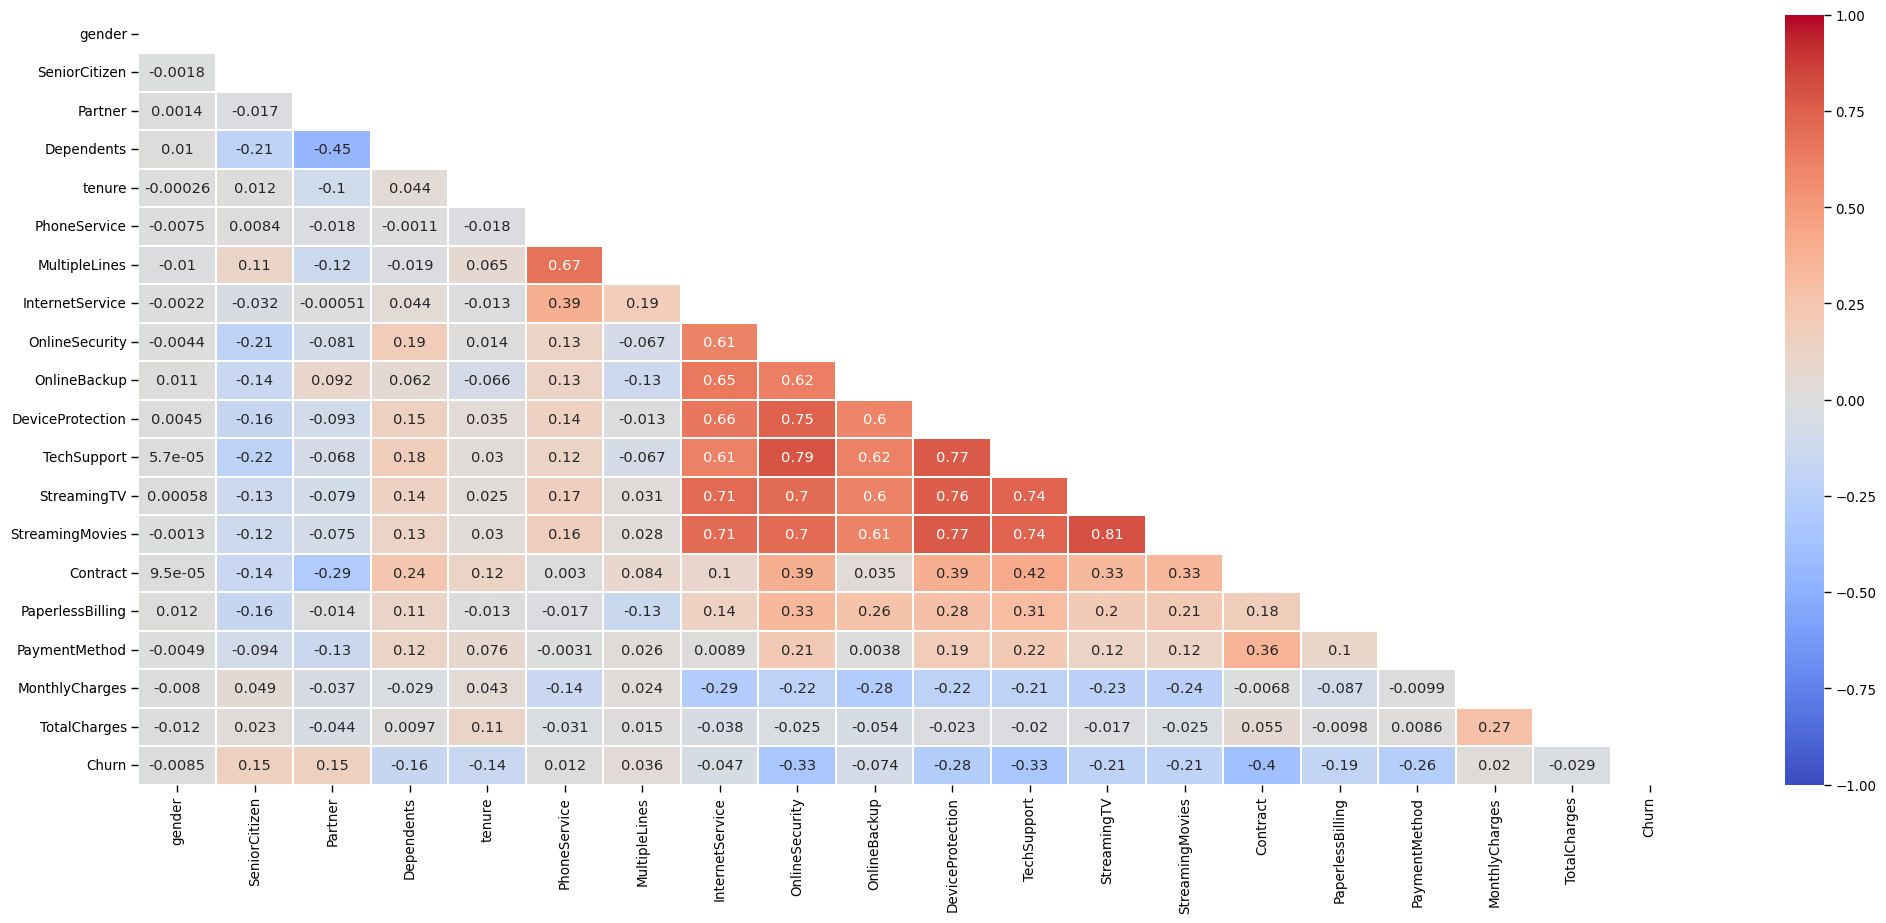

In [82]:
plt.figure(figsize=(25,10))
corr=df.apply(lambda x:pd.factorize(x)[0]).corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,linewidths=.2,cmap='coolwarm',vmin=-1,vmax=1)

In [ ]:
#Data Preprocessing

In [ ]:
#Splitting the data into Train and Test sets

In [83]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series=LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [84]:
df=df.apply(lambda x:object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [85]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [86]:
X=df.drop(columns=['Churn'])
y=df['Churn'].values

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40,stratify=y)

In [88]:
def distplot(feature,frame,color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax=sns.distplot(frame[feature],color= color)

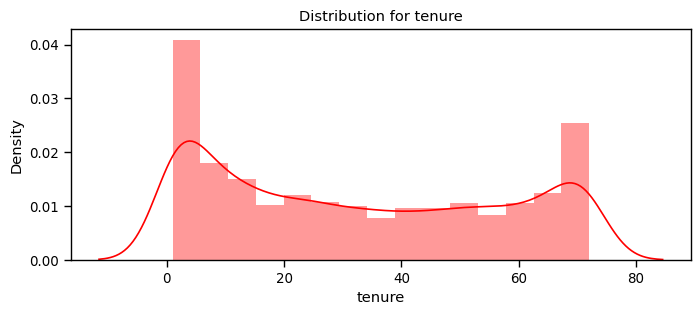

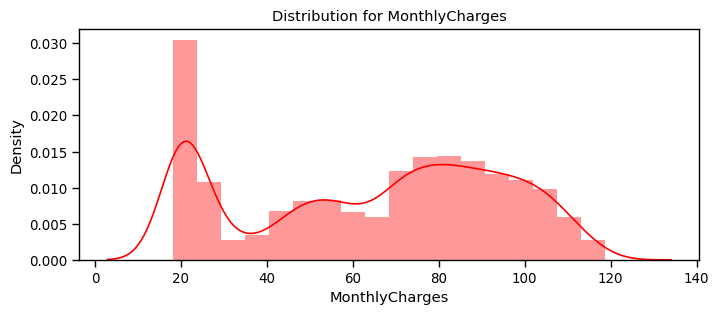

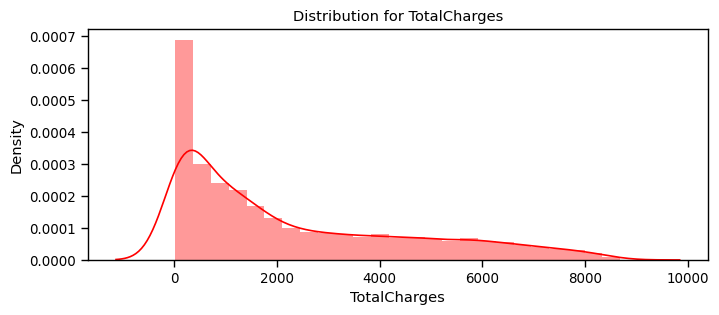

In [89]:
num_cols=["tenure",'MonthlyCharges','TotalCharges']
for feat in num_cols:distplot(feat,df)

In [ ]:
#Standardizing Numeric Attributes

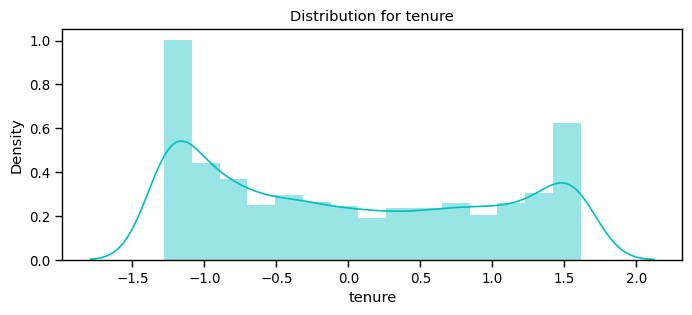

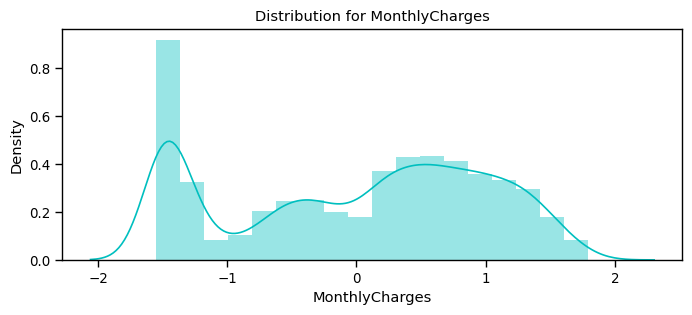

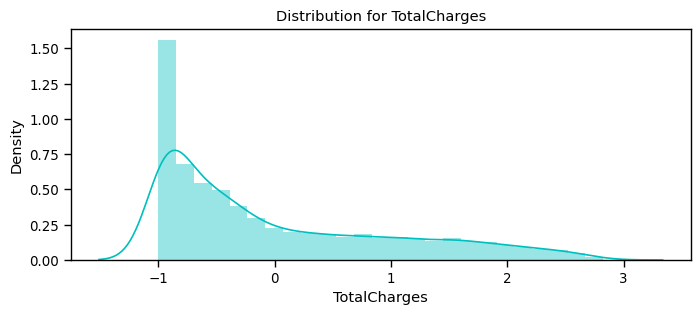

In [90]:
df_std=pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),columns=num_cols)
for feat in numerical_cols:distplot(feat,df_std,color='c')

In [91]:
cat_cols_ohe=['PaymentMethod','Contract','InternetService'] 
cat_cols_le=list(set(X_train.columns)-set(num_cols)-set(cat_cols_ohe))

In [92]:
scaler=StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [ ]:
 #Machine Learning Model Evaluations and Predictions

In [ ]:
#KNN

In [93]:
knn_model=KNeighborsClassifier(n_neighbors=11) 
knn_model.fit(X_train,y_train)
predicted_y=knn_model.predict(X_test)
accuracy_knn=knn_model.score(X_test,y_test)
print("KNN Accuracy:",accuracy_knn)

KNN Accuracy: 0.776303317535545


In [94]:
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
#SVC

In [101]:
svc_model=SVC(random_state=1)
svc_model.fit(X_train,y_train)
predict_y=svc_model.predict(X_test)
accuracy_svc=svc_model.score(X_test,y_test)
print("SVM Accuracy:",accuracy_svc)

SVM Accuracy: 0.8075829383886256


In [96]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
#Random Forest

In [103]:
model_rf=RandomForestClassifier(n_estimators=500,oob_score=True, n_jobs=-1,random_state=50, max_features='sqrt', max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_test=model_rf.predict(X_test)
print("Random Accuracy:",metrics.accuracy_score(y_test, prediction_test))

Random Accuracy: 0.8137440758293839


In [104]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



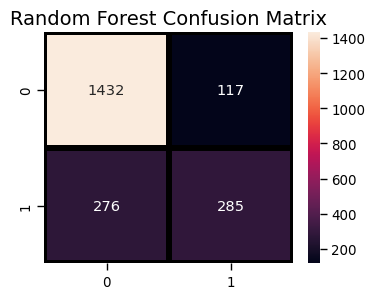

In [105]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction_test),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()

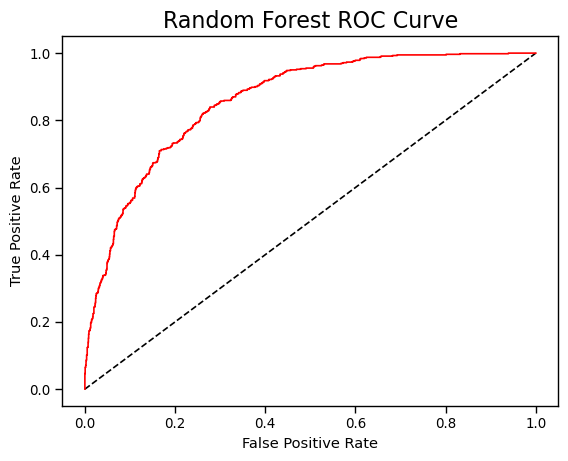

In [110]:
y_rfpred_prob=model_rf.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thresholds=roc_curve(y_test,y_rfpred_prob)
plt.plot([0, 1],[0, 1],'k--')
plt.plot(fpr_rf, tpr_rf,label='Random Forest',color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [111]:
#Logistic Regression

In [107]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr=lr_model.score(X_test,y_test)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 0.8090047393364929


In [108]:
lr_pred=lr_model.predict(X_test)
report=classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



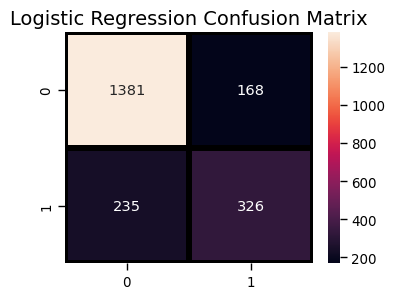

In [109]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.show()

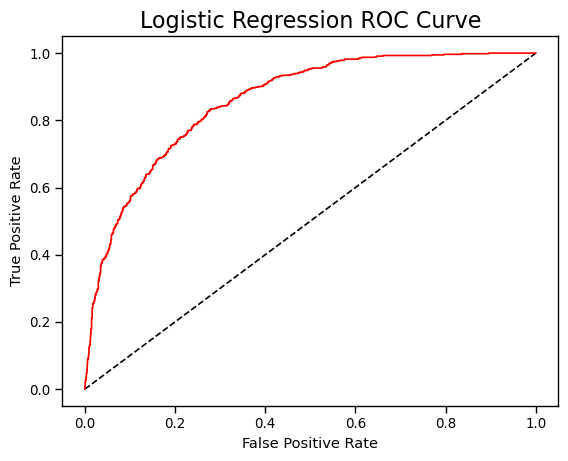

In [112]:
y_pred_prob=lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
plt.plot([0, 1],[0, 1],'k--' )
plt.plot(fpr,tpr,label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
#Decision Tree Classifier

In [113]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y=dt_model.predict(X_test)
accuracy_dt=dt_model.score(X_test,y_test)
print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 0.7274881516587678


In [114]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



In [ ]:
#AdaBoost Classifier

In [117]:
a_model=AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds=a_model.predict(X_test)
print("AdaBoost Classifier Accuracy:",metrics.accuracy_score(y_test,a_preds))

AdaBoost Classifier Accuracy: 0.8075829383886256


In [118]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



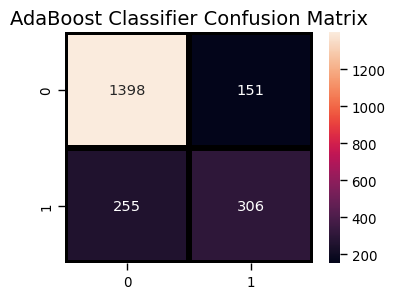

In [119]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
#Gradient Boosting Classifier

In [120]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier Accuracy: 0.8075829383886256


In [121]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



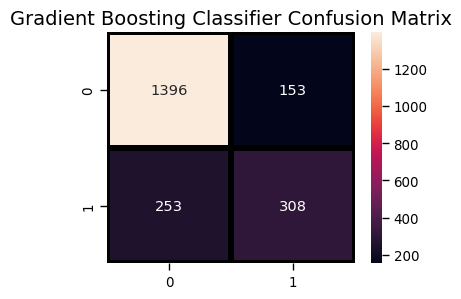

In [122]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
#Voting Classifier

In [127]:
from sklearn.ensemble import VotingClassifier
clf1=GradientBoostingClassifier()
clf2=LogisticRegression()
clf3=AdaBoostClassifier()
eclf1=VotingClassifier(estimators=[('gbc',clf1),('lr',clf2),('abc',clf3)],voting='soft')
eclf1.fit(X_train,y_train)
predictions=eclf1.predict(X_test)
print("Final Accuracy Score:",accuracy_score(y_test, predictions))

Final Accuracy Score: 0.8165876777251185


In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1549
           1       0.68      0.58      0.63       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



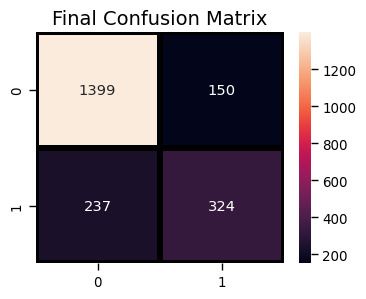

In [130]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Final Confusion Matrix",fontsize=14)
plt.show()